In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


# URL Video YouTube: https://youtu.be/t5oU-BDVQqc

# Método de las diferencias finitas

El método de diferencias finitas consiste en convertir el problema de solución de ecuaciones diferenciales a un problema algebraico. Este método consiste en reemplazar las derivadas de las ecuaciones diferenciales usando cocientes diferenciales. Para el desarrollo de este método es necesario dividir el espacio o el tiempo en pequeñas regiones. Para definir este método partimos de dividir el espacio en pequeñas regiones de ancho $h$, por lo que definiremos $x_{i+1} = x_{i} +h$ y $x_{i-1} = x_{i} -h$, y haciendo uso de la expansión de Taylor tenemos:

$$f(x+h) = f(x) + f'(x) h + \frac{1}{2} f''(x) h^{2}+ \mathcal{O}(h^{3})$$.

Reescribiendo esto bajo la discretización del espacio, obtenemos 

$$f(x_{i+1}) = f(x_{i}) + f'(x_{i}) h + \frac{1}{2} f''(x_{i}) h^{2}+ \mathcal{O}(h^{3})$$.

Si tomamos la aproximación de primer orden en $h$, y despejando $f'(x_{i})$, obtenemos que la primera derivada es:

$$f'(x_{i}) = \frac{f(x_{i+1})-f(x_{i})}{h} - \mathcal{O}(h)$$. 

Esta formula es conocida como diferencias finitas de orden 1 para la primera derivada. Si queremos encontrar la de segundo orden, tendremos que partir de 

$$f(x_{i+2}) = f(x_{i}) + (2h) f'(x_{i}) + \frac{1}{2} (2h)^{2} f''(x_{i})$$,

de donde es fácil obtener para aproximaciones de primer orden que 

$$f'(x_{i}) = \frac{-f(x_{i+1})+4f(x_{i+1})-3f(x_{i})}{2h} + \mathcal{O}(h^{2})$$. 

Igualmente para la aproximación de segundo orden, se obtiene que la segunda derivada tiene la forma:

$$f''(x_{i}) = \frac{f(x_{i+2}) -2f(x_{i+1}) + f(x_{i})}{h^2}$$.

El error entre la solución numérica y la solución exacta está determinado por el error que se comete al pasar de un operador diferencial a un operador de diferencia. Este error se llama error de discretización o error de truncamiento. El término error de truncamiento refleja el hecho de que una parte finita de una serie de Taylor se usa en la aproximación

# Resolver ecuación con el método de diferencias finitas

Es posible extender el método para solucionar ecuaciones diferenciales de primer grado, a segundo grado, es decir sistemas que involucren segundas derivadas. Supongamos que el sistema tiene una ecuación de la siguiente forma

$$ \frac{d^2y}{dt^2}+ g(t,y)\frac{dy}{dt}=f(t,y),\ \ \ a\leq t\leq b, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ y'(a) = \beta$$

Para este sistema deberemos de tener condiciones iniciales para $y$ y su derivada $y'$. Para resolver esta ecuación vamos a definir una variable $w(t) = y'(t)$, 

\begin{align}
\frac{dw}{dt}=&f(t,y)-g(t,y)w \\  
\frac{dy}{dt}=&w(t)\, ,\ \ \ a\leq t\leq b\,, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ w(a) = \beta
\end{align}

Este problema tiene la forma para solución con el metodo de primer orden, y la solución puede ser calculada como:

\begin{align}
w_{i+1}=& w_{i} + [f(t_i,y_i)-g(t_i,y_i)w_i]\Delta t \\  
y_{i+1}=&y_i + w_i \Delta t\, ,\ \ \ a\leq t\leq b\,, \ \ \ \ y(a) = \alpha\ \ \mbox{and}\ w(a) = \beta
\end{align}

# Ejemplo

## Tres leyes de movimiento de Newton
Las ecuaciones de movimiento pueden verse como un sistema de ecuaciones de la forma
\begin{align}
\frac{\boldsymbol{p}}{m}=&\frac{\operatorname{d}\boldsymbol{x}}{\operatorname{d}t}\\
\boldsymbol{p}=& \gamma m \boldsymbol{v}\\
\boldsymbol{F}=&\frac{\operatorname{d}\boldsymbol{p}}{\operatorname{d} t} 
\end{align}

Como ejemplo supondremos que se lanza un objeto de $0.5$ kg desde la parte superior de un edificio de $50$ m con una velocidad horizontal de $5 $m / s. Estudiar la evolución del movimiento.
* Despresiando la fricción del aire

In [2]:
m=.5
g=9.8
# Condiciones iniciales
x=np.array([0,50,0])
v=np.array([5,0,0])
p=m*v
deltat=0.01
# Analisis de los primeros tres segundos
xi = []
pi = []

for t in np.arange( 0,3,deltat):
    Fg=np.array([0,-m*g,0])
    p=p+Fg*deltat
    x=x+(p/m)*deltat
    xi.append(x)
    pi.append(p)
xi = np.array(xi)
pi = np.array(pi)

Text(0, 0.5, '$y$ [m]')

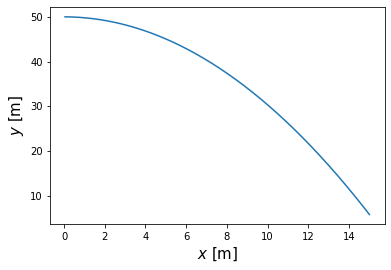

In [3]:
plt.plot(xi[:,0],xi[:,1])
plt.xlabel('$x$ [m]',size=15)
plt.ylabel('$y$ [m]',size=15)